<a href="https://colab.research.google.com/github/seonae0223/mid_project/blob/main/%5B%EC%9D%B4%EC%83%81%EC%B9%98_%EC%A0%9C%EA%B1%B0%5D%EC%86%8C%EB%93%9D_%EB%B6%84%EC%9C%84_%EA%B2%B0%EC%A0%95_%EC%9A%94%EC%9D%B8_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글 폰트 설정

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumGothic'] 10.0


In [12]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 전처리된 데이터 불러오기

In [22]:
import pandas as pd
import numpy as np

FILE_PATH = "/content/drive/MyDrive/Colab Notebooks/한경_MLOps/머신러닝/중간프로젝트/data/cleansed.csv"
df_income = pd.read_csv(FILE_PATH) # encoding='euc-kr' : 한글로 읽어오기
df_income.head()

,Family_ID,Metropolitan,Gender,Family_num,Elder_Household,GrandChild_Household,Single_Household,Multi_Household,Disability_status,Master_EduCode,...,Tenancy_Type,Housing_Type,Debt_Holding,Income_code,Assets,Liabilities,Principal_Interest,Spend_Consum,Spend_NonConsum,Master_Retired
0,10000162,1,2,1,1,0,0,0,0,1,...,2,1,0,2,5700,0,0,1175,121,1
1,10000182,1,1,2,0,0,0,0,0,3,...,2,4,0,3,13720,0,0,2790,425,1
2,10000192,1,2,1,0,0,0,0,0,3,...,3,3,0,3,1410,0,110,1210,109,1
3,10000212,0,2,1,1,0,0,0,0,1,...,1,1,1,2,16800,300,0,1222,27,1
4,10000222,0,1,1,0,0,0,0,0,3,...,1,3,1,4,17000,9000,178,1466,614,1


In [23]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18094 entries, 0 to 18093
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Family_ID             18094 non-null  int64
 1   Metropolitan          18094 non-null  int64
 2   Gender                18094 non-null  int64
 3   Family_num            18094 non-null  int64
 4   Elder_Household       18094 non-null  int64
 5   GrandChild_Household  18094 non-null  int64
 6   Single_Household      18094 non-null  int64
 7   Multi_Household       18094 non-null  int64
 8   Disability_status     18094 non-null  int64
 9   Master_EduCode        18094 non-null  int64
 10  Master_WithLive       18094 non-null  int64
 11  Master_IndustryCode   18094 non-null  int64
 12  Manster_Jobcode       18094 non-null  int64
 13  Master_Age            18094 non-null  int64
 14  Master_EmpCode        18094 non-null  int64
 15  Master_MarriCode      18094 non-null  int64
 16  Tena

In [24]:
df_income.describe()

,Family_ID,Metropolitan,Gender,Family_num,Elder_Household,GrandChild_Household,Single_Household,Multi_Household,Disability_status,Master_EduCode,...,Tenancy_Type,Housing_Type,Debt_Holding,Income_code,Assets,Liabilities,Principal_Interest,Spend_Consum,Spend_NonConsum,Master_Retired
count,1.809400e+04,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000,...,18094.000000,18094.000000,18094.000000,18094.000000,1.809400e+04,18094.000000,18094.000000,18094.000000,18094.000000,18094.000000
mean,4.865128e+08,0.319719,1.286338,2.308832,0.280701,0.002874,0.018183,0.013706,0.133470,2.888250,...,1.716370,1.840665,0.558915,5.049132,5.005981e+04,7608.145849,979.036642,2745.138223,1141.080469,1.220128
std,2.859796e+08,0.466381,0.452062,1.202952,0.449354,0.053533,0.133616,0.116272,0.340091,1.111484,...,1.000757,0.771946,0.496531,2.915635,8.903165e+04,19786.243535,3445.365396,1956.080362,2674.162747,0.414344
min,1.000016e+07,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,147.000000,0.000000,1.000000
25%,2.320003e+08,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,0.000000,2.000000,8.512500e+03,0.000000,0.000000,1338.000000,152.250000,1.000000
50%,4.909003e+08,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,1.000000,2.000000,1.000000,5.000000,2.624800e+04,500.000000,30.000000,2262.000000,566.000000,1.000000
75%,7.232003e+08,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,...,3.000000,2.000000,1.000000,8.000000,5.912900e+04,7900.000000,900.000000,3664.750000,1361.000000,1.000000
max,9.919003e+08,1.000000,2.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,4.000000,4.000000,1.000000,10.000000,3.667350e+06,807000.000000,202257.000000,25660.000000,199712.000000,2.000000


# 각 컬럼 별 값의 이상치 탐지

In [32]:
# IQR 방법을 사용한 이상치 탐지 함수
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [33]:
import pandas as pd

# 결측치와 이상치를 탐지하여 요약하는 함수
def check_missing_and_outliers(df):
    summary = []

    for column in df.columns:
        # 결측치 확인
        missing = df[column].isnull().sum()

        # 이상치 탐지 (수치형 데이터만)
        if df[column].dtype in ['int64', 'float64']:
            outliers = detect_outliers(df, column)
            outliers_count = len(outliers)
        else:
            outliers_count = '수치형 아님'  # 수치형이 아닌 경우 "수치형 아님"으로 표시

        # 결과를 리스트에 추가
        summary.append({
            '컬럼': column,
            '결측치 수': missing,
            '이상치 수': outliers_count
        })

    # 리스트를 데이터프레임으로 변환
    summary_df = pd.DataFrame(summary)

    return summary_df

# 결측치 및 이상치 요약 확인
summary_df = check_missing_and_outliers(df_income)
summary_df


,컬럼,결측치 수,이상치 수
0,Family_ID,0,0
1,Metropolitan,0,0
2,Gender,0,0
3,Family_num,0,24
4,Elder_Household,0,0
5,GrandChild_Household,0,52
6,Single_Household,0,329
7,Multi_Household,0,248
8,Disability_status,0,2415
9,Master_EduCode,0,0


통계 요약 정보:
             Assets    Liabilities  Principal_Interest  Spend_Consum  \
count  1.809400e+04   18094.000000        18094.000000  18094.000000   
mean   5.005981e+04    7608.145849          979.036642   2745.138223   
std    8.903165e+04   19786.243535         3445.365396   1956.080362   
min    0.000000e+00       0.000000            0.000000    147.000000   
25%    8.512500e+03       0.000000            0.000000   1338.000000   
50%    2.624800e+04     500.000000           30.000000   2262.000000   
75%    5.912900e+04    7900.000000          900.000000   3664.750000   
max    3.667350e+06  807000.000000       202257.000000  25660.000000   

       Spend_NonConsum  
count     18094.000000  
mean       1141.080469  
std        2674.162747  
min           0.000000  
25%         152.250000  
50%         566.000000  
75%        1361.000000  
max      199712.000000  


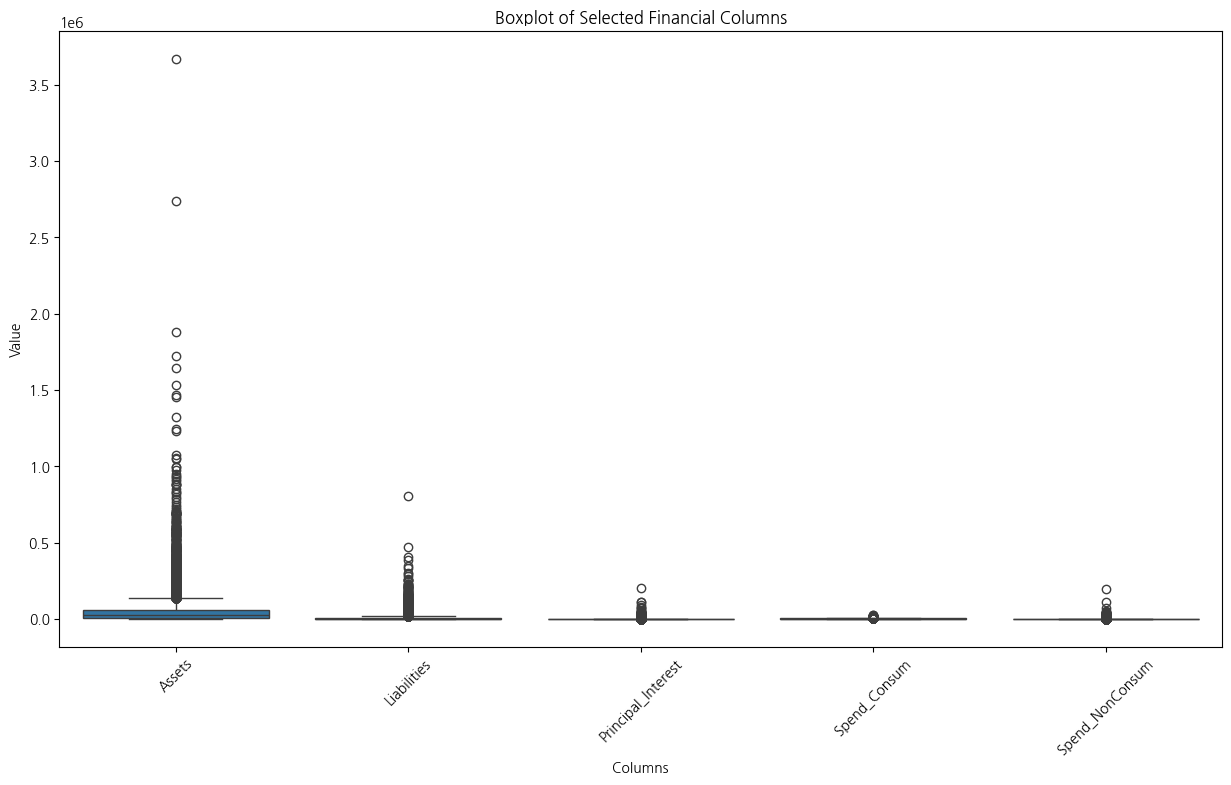

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 분석할 컬럼들 리스트
columns_to_plot = ['Assets', 'Liabilities', 'Principal_Interest', 'Spend_Consum',
                   'Spend_NonConsum']

# 컬럼별 통계 요약 정보 출력
stats_summaries = df_income[columns_to_plot].describe()
print("통계 요약 정보:")
print(stats_summaries)

# boxplot 그리기
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_income[columns_to_plot])
plt.title('Boxplot of Selected Financial Columns')
plt.xlabel('Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)  # X축 레이블 회전
plt.show()


## 컬럼의 값들 분포 확인

### 여러 컬럼들이 가지고 있는 값의 분포 그래프
- `Assets(자산)`, `Liabilities(부채)`, `Principal_Interest(원리금상환금액)`, `Spend_Consum(지출_소비지출비)`, `Spend_NonConsum(지출_비소비지출(보완))` 컬럼 값들의 분포를 확인

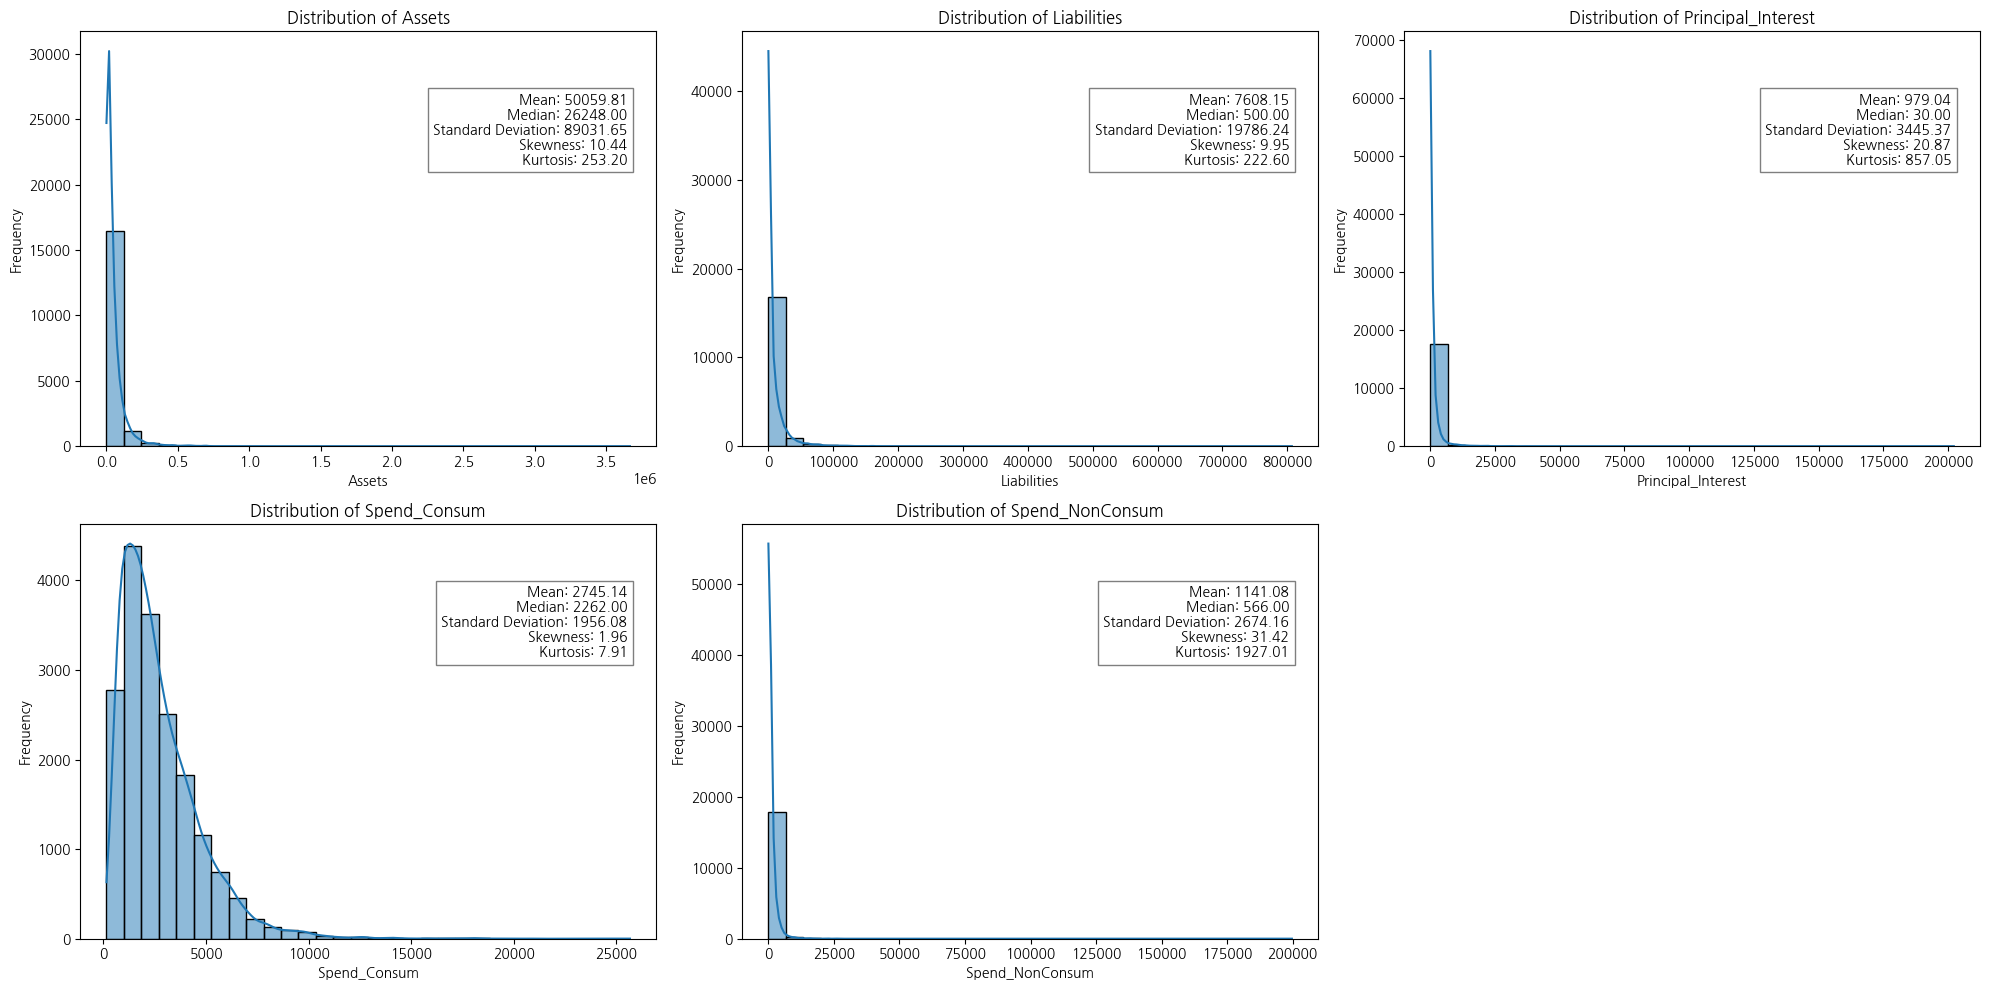

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# 분석할 컬럼들 리스트
columns_to_plot = ['Assets', 'Liabilities', 'Principal_Interest', 'Spend_Consum', 'Spend_NonConsum']

# 행과 열의 개수 설정
num_columns = 3
num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns

# 전체 그래프 크기 설정
plt.figure(figsize=(20, 5 * num_rows))

# 컬럼마다 그래프를 출력
for i, column_to_plot in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_columns, i + 1)

    # 기본 통계 요약
    stats_summary = df_income[column_to_plot].describe()

    # 분포의 형태(왜도와 첨도) 계산
    skewness = df_income[column_to_plot].skew()
    kurtosis = df_income[column_to_plot].kurt()

    # 히스토그램과 KDE 시각화
    sns.histplot(df_income[column_to_plot], bins=30, kde=True)
    plt.title(f'Distribution of {column_to_plot}')
    plt.xlabel(column_to_plot)
    plt.ylabel('Frequency')

    # 텍스트로 통계 요약, 왜도, 첨도 추가
    plt.text(0.95, 0.85, f'Mean: {stats_summary["mean"]:.2f}\n'
                         f'Median: {stats_summary["50%"]:.2f}\n'
                         f'Standard Deviation: {stats_summary["std"]:.2f}\n'
                         f'Skewness: {skewness:.2f}\n'
                         f'Kurtosis: {kurtosis:.2f}',
             transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(facecolor='white', alpha=0.5))

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()

plt.show()


# 이상치 해결하기

## 2. 이상치 제거하기

**IQR(Interquartile Range) 방법:**
- IQR 계산: IQR = Q3(75th percentile) - Q1(25th percentile)
이상치 제거 범위:

하한값(Lower bound) = Q1 - 1.5 * IQR

상한값(Upper bound) = Q3 + 1.5 * IQR

이 범위를 벗어난 값들이 이상치로 간주될 수 있음.
컬럼별 분석 및 권장 이상치 제거 기준

`자산`
- IQR: 59,129−8,512.5=50,616.559,129 - 8,512.5 = 50,616.559,129−8,512.5=50,616.5
- Lower bound: 8,512.5−1.5×50,616.5=−66,412.258,512.5 - 1.5 \times 50,616.5 = -66,412.258,512.5−1.5×50,616.5=−66,412.25 (음수는 의미가 없으므로 최소 0)
- Upper bound: 59,129+1.5×50,616.5=134,053.7559,129 + 1.5 \times 50,616.5 = 134,053.7559,129+1.5×50,616.5=134,053.75
- 권장 기준: 자산 값이 134,053.75원을 초과하는 값은 이상치로 제거할 수 있음


`부채`
- IQR: 7,900−0=7,9007,900 - 0 = 7,9007,900−0=7,900
- Lower bound: 0−1.5×7,900=−11,8500 - 1.5 \times 7,900 = -11,8500−1.5×7,900=−11,850 (음수는 의미가 없으므로 최소 0)
- Upper bound: 7,900+1.5×7,900=19,7507,900 + 1.5 \times 7,900 = 19,7507,900+1.5×7,900=19,750
- 권장 기준: 부채 값이 19,750원을 초과하는 값은 이상치로 제거할 수 있음

`원리금상환금액`
- IQR: 900−0=900900 - 0 = 900900−0=900
- Lower bound: 0−1.5×900=−1,3500 - 1.5 \times 900 = -1,3500−1.5×900=−1,350 (음수는 의미가 없으므로 최소 0)
- Upper bound: 900+1.5×900=2,250900 + 1.5 \times 900 = 2,250900+1.5×900=2,250
- 권장 기준: 원리금상환금액 값이 2,250원을 초과하는 값은 이상치로 제거할 수 있음

`지출_소비지출비`
- IQR: 3,664.75−1,338=2,326.753,664.75 - 1,338 = 2,326.753,664.75−1,338=2,326.75
- Lower bound: 1,338−1.5×2,326.75=−2,652.1251,338 - 1.5 \times 2,326.75 = -2,652.1251,338−1.5×2,326.75=−2,652.125 (음수는 의미가 없으므로 최소 0)
- Upper bound: 3,664.75+1.5×2,326.75=7,654.1253,664.75 + 1.5 \times 2,326.75 = 7,654.1253,664.75+1.5×2,326.75=7,654.125
- 권장 기준: 지출_소비지출비 값이 7,654.125원을 초과하는 값은 이상치로 제거할 수 있음

`지출_비소비지출(보완)`
- IQR: 1,361−152.25=1,208.751,361 - 152.25 = 1,208.751,361−152.25=1,208.75
- Lower bound: 152.25−1.5×1,208.75=−1,661.875152.25 - 1.5 \times 1,208.75 = -1,661.875152.25−1.5×1,208.75=−1,661.875 (음수는 의미가 없으므로 최소 0)
- Upper bound: 1,361+1.5×1,208.75=3,175.8751,361 + 1.5 \times 1,208.75 = 3,175.8751,361+1.5×1,208.75=3,175.875
- 권장 기준: 지출_비소비지출(보완) 값이 3,175.875원을 초과하는 값은 이상치로 제거할 수 있음


In [37]:
import pandas as pd

# IQR 방법을 사용한 이상치 탐지 함수
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# 분석할 컬럼들 리스트
columns_to_check = ['Assets', 'Liabilities', 'Principal_Interest', 'Spend_Consum', 'Spend_NonConsum']

# 원본 데이터프레임 복사
df_cleaned = df_income.copy()

# 각 컬럼에 대해 이상치가 포함된 행을 삭제
for column in columns_to_check:
    outliers = detect_outliers(df_cleaned, column)
    df_cleaned = df_cleaned.drop(outliers.index)

# 이상치 제거 후의 데이터프레임의 shape
# 이상치 제거 후의 데이터 : df_cleaned
cleaned_shape = df_cleaned.shape

# 원본 데이터프레임의 shape
original_shape = df_income.shape

# 결과 출력
print(f"원본 데이터 크기: {original_shape}")
print(f"이상치 제거 후 데이터 크기: {cleaned_shape}")

원본 데이터 크기: (18094, 26)
이상치 제거 후 데이터 크기: (11939, 26)


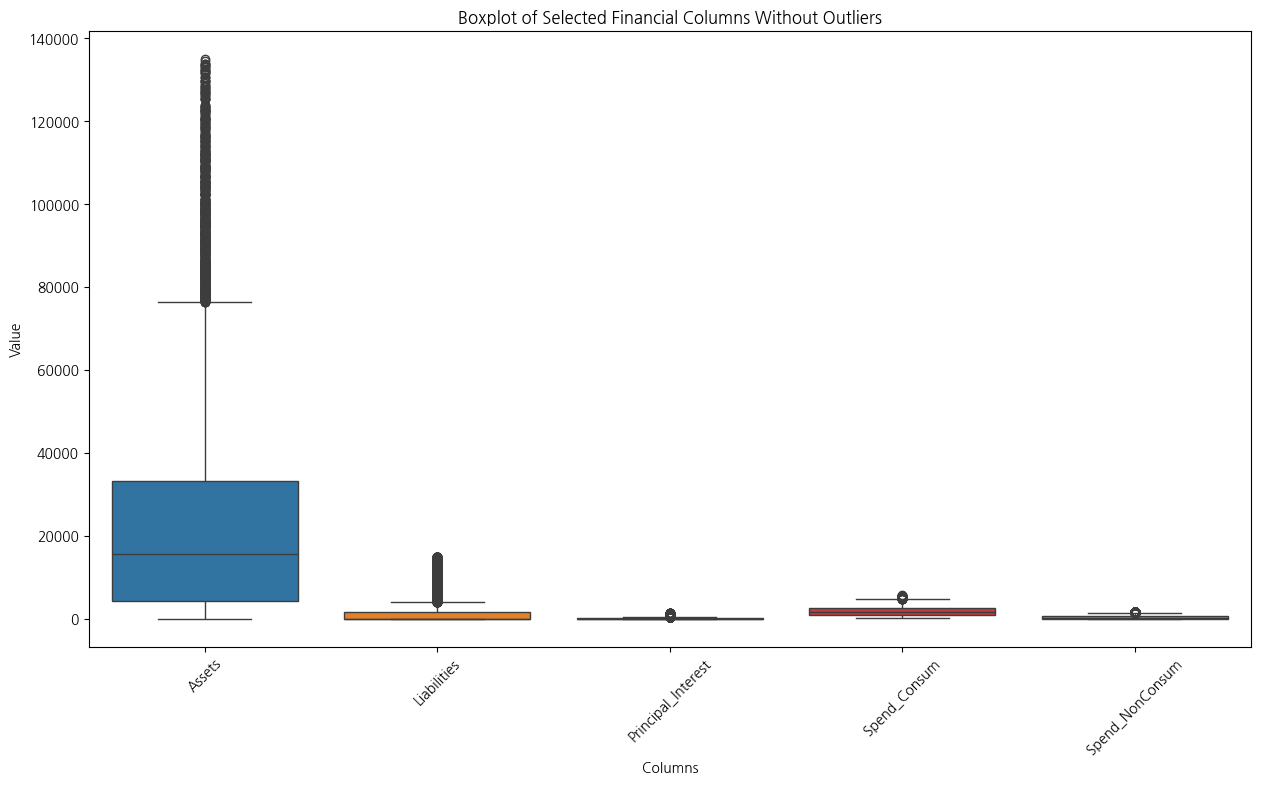

In [38]:
# 이상치가 제거된 데이터프레임을 사용하여 boxplot 생성
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cleaned[columns_to_check])
plt.title('Boxplot of Selected Financial Columns Without Outliers')
plt.xlabel('Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)  # X축 레이블 회전
plt.show()

In [39]:
# 이상치가 제거된 데이터프레임을 CSV 파일로 저장
output_file_path = '/content/drive/MyDrive/Colab Notebooks/한경_MLOps/머신러닝/중간프로젝트/data/cleaned_data.csv'
df_cleaned.to_csv(output_file_path, index=False, encoding='euc-kr')

output_file_path

'/content/drive/MyDrive/Colab Notebooks/한경_MLOps/머신러닝/중간프로젝트/data/cleaned_data.csv'